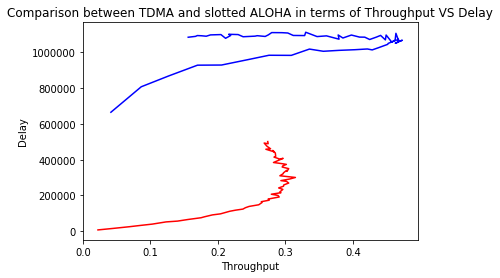

In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# global parameters
slots = 10**4
stations = 100
retrans_prob = 0.5
data_birth_rate = np.arange(0.0005,0.0305,0.0005)

# calculate data birth interval
def interval(lambd):
    return (-1/lambd) * np.log(random.random())
    pass

# slotted ALOHA simulator
def saloha(lambd):
    
    # state: 0 free; 1 success; >1 collision
    state = [0 for i in range(slots)]
    delay = 0
    
    for i in range(slots):
        for j in range(stations):
            
            if random.random() <= lambd:
                trans_interval = int(interval(lambd))
                slot = i + trans_interval
                
                if slot < slots:
                    state[slot] += 1
                    delay += trans_interval
                    # if there is collision, process retransmission with retrans_prob
                    if state[slot] > 1 and random.random() <= retrans_prob:
                        retrans_interval = int(interval(lambd))
                        new_slot = slot + retrans_interval 
                        if new_slot < slots:
                            state[slot] -= 1
                            state[new_slot] += 1 
                            delay -= trans_interval
                            delay += retrans_interval
                    
    success = 0
    for i in range(slots):
        if state[i] == 1:
            success += 1

    return float(success)/slots, delay
    pass

# TDMA simulator
def tdma(lambd):
    # state: 0 free; 1 success; >1 collision
    state = [0 for i in range(slots)]
    delay = 0
    
    for i in range(slots):
        n = i // stations
        for j in range(stations):
            if random.random() <= lambd:
                slot = j + n*stations
                if slot >= i:
                    state[slot] += 1
                    delay += slot - i
                
    success = 0
    for i in range(slots):
        if state[i] == 1:
            success += 1
            
    return float(success)/slots, delay
    pass

# plot graphs
def plotter():
    
    thrgh_tdma = []
    delay_tdma = []
    thrgh_aloha = []
    delay_aloha = []
    
    for lambd in data_birth_rate:
        throughput_t, delay_t = tdma(lambd)
        thrgh_tdma.append(throughput_t)
        delay_tdma.append(delay_t)
        
        throughput_a, delay_a = saloha(lambd)
        thrgh_aloha.append(throughput_a)
        delay_aloha.append(delay_a)
    
    plt.plot(thrgh_tdma, delay_tdma, color = 'red')
    plt.plot(thrgh_aloha, delay_aloha, color = 'blue')
    plt.xlabel("Throughput")
    plt.ylabel("Delay")
    plt.title('Comparison between TDMA and slotted ALOHA in terms of Throughput VS Delay')
    plt.show() 
    
    pass


if __name__ == "__main__":
    plotter()